# Hass Avocados

**Describe your dataset.** 

Describe and explore your dataset in the initial section of your Report.  
What does your data contain and what is its background? Where does it come from?  
Why is it interesting or significant?  
Conduct summary statistics and produce visualizations for the particular variables from the dataset that you will use.



#### from kaggle: [https://www.kaggle.com/neuromusic/avocado-prices/home]

>This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. Here's how the Hass Avocado Board describes the data on their website:

    > The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

>Some relevant columns in the dataset:

* Date - The date of the observation
* AveragePrice - the average price of a single avocado
* type - conventional or organic
* year - the year
* Region - the region or market, contains rollups
* Total Volume - Total number of avocados sold
* 4046 - Total number of avocados with PLU 4046 sold - small Hass
* 4225 - Total number of avocados with PLU 4225 sold - large Hass
* 4770 - Total number of avocados with PLU 4770 sold - extra large Hass

In [22]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

##### Quesions: 
* In what region is it best to live in if you are price sensitive and love avocados?
* I can never seem to finish an entire bag of avocados before they go bad, how prevelant are these extra large bags of avocadoes? Areas with the highest rates of large bag sales may be an indication that avocados are most often eaten in restaurant dishes rather than through grocery store consumption?
* How much more expensive is it to buy organic and do people actually buy organic avocados? When prices fluctuate do people cut back on organic or are they so rich that they just keep buying them?
* Is there a region that has suddenly discovered the joy of avocadoes in the past 4 years?
* I like avocadoes all year round, how does seasonality affect demand for avocados? Are there are event driven spikes in sales?

In [4]:
df_avo = pd.DataFrame(pd.read_csv('thinkful_datasets/avocado.csv',header=0, index_col=0))
df_avo['month'] = pd.to_datetime(df_avo['Date']).dt.month

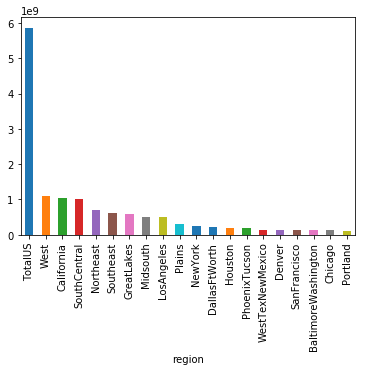

In [27]:
# Total Volume of Avocados sold by region
df_avo.pivot_table(index=['region'], 
                   aggfunc=sum)['Total Volume'].sort_values(
    ascending=False).head(20).plot(kind='bar')



In [32]:
# Avg Price per Avocados sold by region
df_avo.pivot_table(index=['region'], 
                   aggfunc=np.mean)['AveragePrice'].sort_values(
    ascending=False).head(20)

region
HartfordSpringfield    1.818639
SanFrancisco           1.804201
NewYork                1.727574
Philadelphia           1.632130
Sacramento             1.621568
Charlotte              1.606036
Northeast              1.601923
Albany                 1.561036
Chicago                1.556775
RaleighGreensboro      1.555118
BaltimoreWashington    1.534231
Boston                 1.530888
Syracuse               1.520325
BuffaloRochester       1.516834
HarrisburgScranton     1.513284
Jacksonville           1.510947
Orlando                1.506213
GrandRapids            1.505000
NorthernNewEngland     1.477396
Spokane                1.445592
Name: AveragePrice, dtype: float64

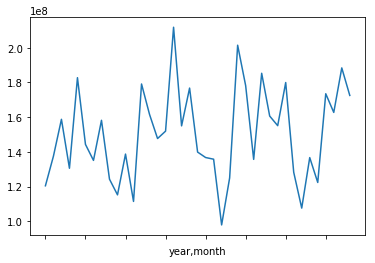

In [13]:
df_us = df_avo[df_avo['region']=='TotalUS'].sort_values(['Date'])
df_us.groupby(['year','month']).sum()['Total Volume'].plot()

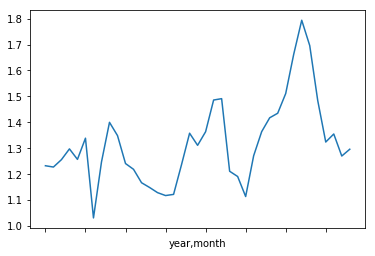

In [17]:
df_us.groupby(['year','month']).mean()['AveragePrice'].plot()

In [12]:
df_avo.groupby(['year'])['Total Volume'].describe()


,count,mean,std,min,25%,50%,75%,max
year,,,,,,,,
2015,5615.0,7.810274e+05,3.171256e+06,84.56,6931.6300,76146.82,400176.6800,44655461.51
2016,5616.0,8.584206e+05,3.478732e+06,385.55,10643.6850,109597.29,451107.2925,52288697.89
2017,5722.0,8.623393e+05,3.481957e+06,515.01,13790.6975,122915.75,426454.5125,61034457.10
2018,1296.0,1.066928e+06,4.285501e+06,2064.90,17690.9825,157175.09,529462.2450,62505646.52


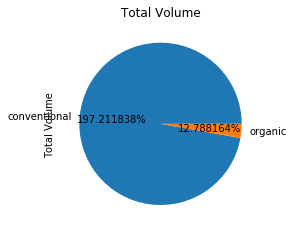

In [53]:
plt.figure(figsize=(8,4))
# plot chart
ax1 = plt.subplot(121, aspect='equal')
df_us.groupby(['type']).sum()['Total Volume'].plot(kind='pie', y = 'Total Volume', ax=ax1, autopct='1%1f%%',
                                                   labels=df_us['type'])
plt.title('Total Volume')
plt.show()


In [ ]:
df_us.pivot_table()

In [54]:
df_us.groupby(['type']).sum()['Total Volume']

type
conventional    5.701222e+09
organic         1.635186e+08
Name: Total Volume, dtype: float64

In [6]:
df_us

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month
48,2015-01-25,1.04,28470310.84,12167445.03,10734652.82,768020.05,4800192.94,3978636.90,812924.73,8631.31,conventional,2015,TotalUS,1
49,2015-01-18,1.03,29043458.85,11858139.34,11701947.80,831301.90,4652069.81,3873041.26,771093.20,7935.35,conventional,2015,TotalUS,1
50,2015-01-11,1.01,29063542.75,11544810.53,12134773.38,866574.66,4517384.18,3783261.16,718333.87,15789.15,conventional,2015,TotalUS,1
51,2015-01-04,0.95,31324277.73,12357161.34,13624083.05,844093.32,4498940.02,3585321.58,894945.63,18672.81,conventional,2015,TotalUS,1
48,2015-01-25,1.53,556368.86,207494.87,212312.02,4753.87,131808.10,95964.83,35843.27,0.00,organic,2015,TotalUS,1
49,2015-01-18,1.42,713120.00,254319.58,311811.01,4020.85,142968.56,101850.23,41118.33,0.00,organic,2015,TotalUS,1
50,2015-01-11,1.42,669528.88,270966.74,260971.60,3830.42,133760.12,106844.49,26915.63,0.00,organic,2015,TotalUS,1
51,2015-01-04,1.46,612910.15,233286.13,216611.20,4370.99,158641.83,115068.71,43573.12,0.00,organic,2015,TotalUS,1
47,2016-01-31,0.93,34721249.92,11098088.49,13278053.61,1643703.17,8701404.65,6684515.27,1823889.58,192999.80,conventional,2016,TotalUS,1
48,2016-01-24,0.95,32787079.21,7020459.00,14054367.50,1440380.36,10271872.35,7438489.60,2668368.01,165014.74,conventional,2016,TotalUS,1


In [21]:
df_avo_type = df_us.pivot_table(index=['year', 'type'], aggfunc=[sum, np.mean, np.max, np.min, np.std]).reset_index()
df_avo_type.drop(columns=['4046', '4225', '4770', 'Date', 'month'], axis=1)

In [60]:
df_region = df_avo[(df_avo['region']=='California') | (df_avo['region']=='West')|(df_avo['region']=='SouthCentral')
                   |(df_avo['region']=='Northeast')|(df_avo['region']=='Southeast')|(
                  df_avo['region']=='GreatLakes')|(df_avo['region']=='Midsouth')|(df_avo['region']=='Plains')]

No handles with labels found to put in legend.


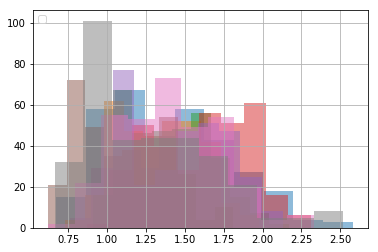

In [69]:
# switch to boxplot
df_region.groupby(['region'])['AveragePrice'].hist()


In [ ]:
def region(x):
    if x == ['TotalUS']
    return 'country'
country = ['TotalUS']
region = ['California', 'West', 'SouthCentral', 'Northeast', 'Southeast', 'GreatLakes', 'Midsouth', 'Plains']
market = ['NewYork', 'WestTexNewMexico', 'NorthernNewEngland', 'SouthCarolina', 
          'DallasFtWorth', 'Houston', 'PhoenixTucson', 'Denver', 'SanFrancisco', 'BaltimoreWashington', 
          'Chicago', 'Portland', 'Seattle', 'MiamiFtLauderdale', 'Boston', 'SanDiego', 'Atlanta', 
          'Sacramento', 'Philadelphia', 'Tampa', 'Detroit', 'Orlandao', 'LasVegas', 'HartfordSpringfield', 
          'RaleighGreensboro', 'NewOrleansMobile', 'CincinnatiDayton',  'RichmondNorfolk', 'HarrisburgScranton', 
          'Nashville', 'Charlotte', 'StLouis', 'Indianapolis ', 'GrandRapids', 'Columbus', 
          'Jacksonville',  'Roanoke', 'BuffaloRochester', 'Pittsburgh', 'Louisville', 'Albany', 'Spokane', 'Boise',  'Syracuse']

In [13]:
df_avo['region'].unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

In [21]:
df_avo.groupby(['region']).sum()['Total Volume'].sort_values(
    ascending=False)

region
TotalUS                5.864740e+09
West                   1.086779e+09
California             1.028982e+09
SouthCentral           1.011280e+09
Northeast              7.132809e+08
Southeast              6.152384e+08
GreatLakes             5.896425e+08
Midsouth               5.083494e+08
LosAngeles             5.078965e+08
Plains                 3.111885e+08
NewYork                2.407341e+08
DallasFtWorth          2.084193e+08
Houston                2.031679e+08
PhoenixTucson          1.956433e+08
WestTexNewMexico       1.445218e+08
Denver                 1.389025e+08
SanFrancisco           1.358302e+08
BaltimoreWashington    1.347139e+08
Chicago                1.337023e+08
Portland               1.105522e+08
Seattle                1.092142e+08
MiamiFtLauderdale      9.767322e+07
Boston                 9.727398e+07
SanDiego               8.979192e+07
Atlanta                8.860512e+07
Sacramento             7.516375e+07
Philadelphia           7.183880e+07
NorthernNewEngland   

In [19]:
df_avo.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


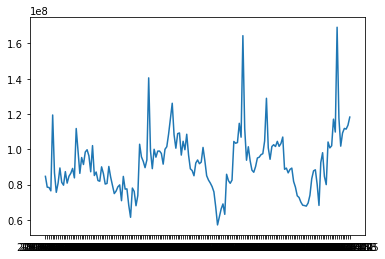

In [28]:
plt.plot(df_avo.pivot_table(index=['Date'],aggfunc=np.sum)['Total Volume'])

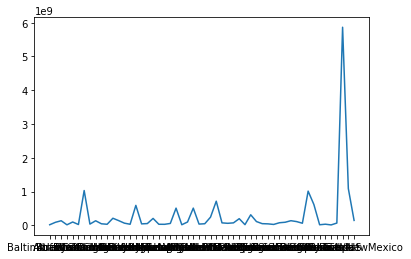

In [31]:
plt.plot(df_avo.pivot_table(index=['region'],aggfunc=np.sum)['Total Volume'], type)

In [41]:
df_region = df_avo.pivot_table(index=['region'], aggfunc=sum)['Total Volume'].sort_values(ascending=False)

In [47]:
region_total = df_avo.groupby(by=['region']).sum()[3:-1]
region_total['month'] = pd.to_datetime(df_avo['Date']).dt.month
region_total

In [ ]:
works.artist.value_counts().head(50)[1:51].plot(kind='bar', figsize=(10,5))
plt.ylabel('Artworks Count')

In [ ]:
len(artists)